In [137]:
from optibook.synchronous_client import Exchange
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

import logging
logger = logging.getLogger('client')
logger.setLevel('ERROR')

print("Setup was successful.")

Setup was successful.


In [138]:
instrument_id = 'PHILIPS_A'

In [346]:
e = Exchange()
a = e.connect()

2021-01-24 13:06:56,651 [asyncio   ] [MainThread  ] Using selector: EpollSelector
2021-01-24 13:06:56,796 [client    ] [Thread-34   ] Forcing a disconnect due to an error: Closing connection because someone else logged in with the same credentials. Only one session may be active at the same time.


In [347]:
def plot_bid_ask_spread(timeframe):
    spread_list = []
    t_end = time.time() + timeframe

    while time.time() < t_end:
        book = e.get_last_price_book(instrument_id)
        if book.bids and book.asks:
            best_bid = book.bids[0].price
            best_ask = book.asks[0].price
            bid_ask_spread = best_ask - best_bid
            spread_list.append(bid_ask_spread)
        else:
            spread_list.append(0) 
            
    res = np.array(spread_list)
    plt.plot(res)
    plt.ylabel('bid-ask spread')
    plt.xlabel('time')
    plt.title(f'Change in bid-ask spread in the last {timeframe}s')
    plt.show()

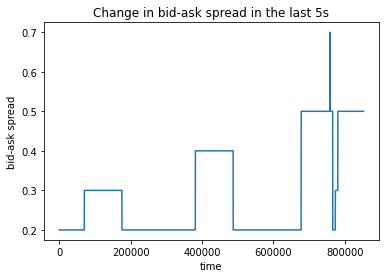

In [348]:
plot_bid_ask_spread(timeframe=5)